**Exploratory Data Analysis**


In [155]:
import pandas as pd
import matplotlib.pylab as plt
plt.style.use("ggplot")

In [156]:
data = pd.read_csv('/Users/abhinavvadali/Documents/PycharmProjects/tensorflow/Dataset of Diabetes .csv')

In [178]:
data.head(5)

,ID,Num_Patient,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class
0,502,17975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
1,735,34221,M,26,4.5,62,4.9,3.7,1.4,1.1,2.1,0.6,23.0,N
2,420,47975,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
3,680,87656,F,50,4.7,46,4.9,4.2,0.9,2.4,1.4,0.5,24.0,N
4,504,34223,M,33,7.1,46,4.9,4.9,1.0,0.8,2.0,0.4,21.0,N


Through the head function, we can take a look at the data and the features we have. From here, we can decide what data analysis we should do to investigate the data.

In [180]:
data.dtypes

ID               int64
Num_Patient      int64
Gender          object
Age              int64
Urea           float64
Cr               int64
HbA1c          float64
Chol           float64
TG             float64
HDL            float64
LDL            float64
VLDL           float64
BMI            float64
Class           object
dtype: object

In the data types, we see that gender is an object, specifically a string. Because of this, we will need to encode it later into an integer so that we can use ML models on the dataset.

In [162]:
data.drop(columns = ['ID', 'Num_Patient']).describe()

,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


The table above displays various summary statistics for each feature of the data, including mean, standard deviation, extrema, and more. Using this data, we can learn basic information about each feature and determine if further analysis is needed.

From a quick glance, I noticed that the mean age was approximately 53 years old with the 25% age being 51. Because these ages were close together, I decided to conduct further analysis later on the distribution of ages in the dataset. As for the rest of the features, I conducted research on the medical significance of them to determine whether their statistics were in an appropriate range. There were no major discrepancies, so I decided to only look at age.



In [176]:
data.isna().sum()

ID             0
Num_Patient    0
Gender         0
Age            0
Urea           0
Cr             0
HbA1c          0
Chol           0
TG             0
HDL            0
LDL            0
VLDL           0
BMI            0
Class          0
dtype: int64

Our dataset has no null or missing values. This means that we do not have to drop any values and deal with that in our dataset.

In [164]:
data.loc[data.duplicated()]

,ID,Num_Patient,Gender,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,Class


None of the records in our data have been mistakenly duplicated. This means that we do not have to drop any rows from the dataset.

In [165]:
data['Gender'].value_counts()

Gender
M    565
F    435
Name: count, dtype: int64

Upon running a chi-squared test on the data because it is categorical, I obtained a p-value of 0.00004, far less than 0.05. Because of this result, the difference is significant between the amount of males and females. This means that the model more accurately generalizes men than women.

Text(0, 0.5, 'Frequency')

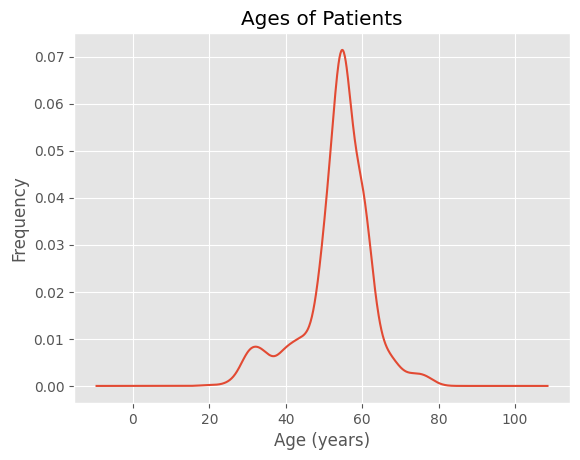

In [166]:
age_plot = data['Age'].plot(kind = 'kde', title = 'Ages of Patients')
age_plot.set_xlabel("Age (years)")
age_plot.set_ylabel("Frequency")

As mentioned before, I wanted to investigate the age distribution further. The plot of ages is heavily populated with ages between 50 and 60. This means that the dataset does not accurately reflect the diabetes risk for younger patients and more elderly patients.

Text(0, 0.5, 'Frequency')

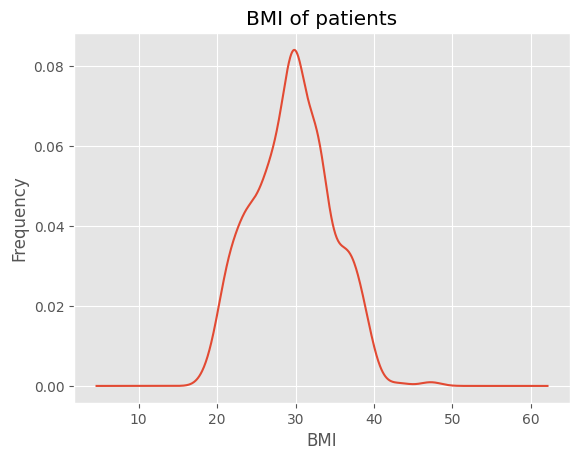

In [170]:
bmi_plot = data['BMI'].plot(kind = "kde", title = "BMI of patients")
bmi_plot.set_xlabel("BMI")
bmi_plot.set_ylabel("Frequency")

The BMIs of patients is heavily concentrated between 20 and 40, making the model unable to accurately predict results outside of this range.

In [167]:
data.drop(columns = ['ID', 'Num_Patient']).select_dtypes(exclude = 'object').corr()

,Age,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
Age,1.000000,0.105092,0.054941,0.379136,0.036649,0.148204,-0.020038,0.016105,-0.087903,0.375956
Urea,0.105092,1.000000,0.624134,-0.023603,0.001852,0.040980,-0.036994,-0.007301,-0.011191,0.045618
Cr,0.054941,0.624134,1.000000,-0.037412,-0.007097,0.056579,-0.023804,0.039479,0.009615,0.054746
HbA1c,0.379136,-0.023603,-0.037412,1.000000,0.177489,0.218556,0.028933,0.011057,0.073462,0.413350
Chol,0.036649,0.001852,-0.007097,0.177489,1.000000,0.321789,0.103814,0.416665,0.076294,0.013678
TG,0.148204,0.040980,0.056579,0.218556,0.321789,1.000000,-0.083001,0.015378,0.144570,0.110757
HDL,-0.020038,-0.036994,-0.023804,0.028933,0.103814,-0.083001,1.000000,-0.142079,-0.059275,0.072409
LDL,0.016105,-0.007301,0.039479,0.011057,0.416665,0.015378,-0.142079,1.000000,0.062795,-0.067322
VLDL,-0.087903,-0.011191,0.009615,0.073462,0.076294,0.144570,-0.059275,0.062795,1.000000,0.198133
BMI,0.375956,0.045618,0.054746,0.413350,0.013678,0.110757,0.072409,-0.067322,0.198133,1.000000


The table above shows the correlations of each numerical factor with each other.